In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<center><h1 style="color:#D55250;">Heart Attack Prediction</h1></center>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQXU_kDN_Je2BndsIYFucc2t_pQ3b4w3wvr0Q&usqp=CAU" width=500></center>


<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
        <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
            <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>


<center><h3 style="color:#DC143C;">Hello today I will deal with the heart attack data set with artificial neural networks</h3></center>
          <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
              <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
               
                
                
<center><h4 style="color:#DC143C;">A heart attack can be a problem for people of all ages and groups</h4></center>
                  <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
<center><h4 style="color:#DC143C;">Today we will be interested in building a beautiful model</h4></center>
                      <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center><h4 style="color:#DC143C;">I'm thinking of making a presentation as beautiful as I can</h4></center>
                          <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
                              <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
                          
                          
                          
<center><h2 style="color:#8B0000;">Content</h2></center>

[<center>Load Dataset</center>](#1)

[<center>Missing Value Check</center>](#2) 
                                  
[<center>Outlier</center>](#3)
                                  
[<center>Artifical Neural Networks</center>](#4)
                                  
[<center>Model Optimization</center>](#5) 

<a id="1"></a> <br>
<h1 style="color:#5F9EA0;"><center>Load Dataset</center><h1>

In [ ]:
data = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
data.head()
# Here is our data set

<a id="2"></a> <br>
<center><h1 style="color:#5F9EA0;">Missing Value Check</h1></center>

In [ ]:
data.isnull().sum()
# This is beautiful, there is no missing value

<a id="3"></a> <br>
<center><h1 style="color:#5F9EA0;">Outlier</h1></center>

<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p><p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center><b>We need to check contradictory situations,but before that, it is useful to look at the correlation between variables.</b></center>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=False,linewidths=1);

<h3><center>Thalach,Slope,CP,I think these affect our output.</center></h3>



<center>Now let's take the contradiction of the 3 variables that affect us.First, let's start with the Thalach variable</center>







<center><h2 style="color:#8A2BE2;">Thalach : Contradictory observation</h2></center>

In [ ]:
sns.boxplot(data['thalach'],palette='plasma_r');
# I want to believe that this outlier will not affect us much.

<center><h2 style="color:#8A2BE2;">Slope : Contradictory Observation </h2></center>

In [ ]:
sns.boxplot(data['slope'],palette='Set3');
# Just fine

<center><h2 style="color:#8A2BE2;">CP : Contradictory Observation </h2></center>

In [ ]:
sns.boxplot(data['cp'],palette='terrain');
# Done

<center><h3 style="color:#DC143C;">We have no missing values, contradictory observations are not a problem,I think we can now build a beautiful model of artificial neural networks</h3></center>

<a id="4"></a> <br>
<center><h1 style="color:#5F9EA0;">Artificial Neural Networks</h1></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center><img src="https://miro.medium.com/max/1100/1*YgJ6SYO7byjfCmt5uV0PmA.png" width=600></center>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

# Here are the libraries we need

<center><h2 style="color:#FF7F50;">We need to separate our data set.</h2></center>

In [ ]:
y = data['target']
x = data.drop(['target'],axis=1)
# Y is our target variable
# X contains arguments

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
# Train and test separation.

<center><h2 style="color:#FF7F50;">Now we need to do a scaling process for the model to work better.</h2></center>

In [ ]:
from sklearn.preprocessing import StandardScaler
# Here is the necessary library.

In [ ]:
Scaler = StandardScaler() # We create a scaling object.
Scaler.fit(x_train) # We fit this to x_train.
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)
# We have now standardized the sets to be used.

In [ ]:
from sklearn.neural_network import MLPClassifier # Our artificial neural network library.
MLPC = MLPClassifier().fit(x_train_scaled,y_train) # We use x_train_scaled.
y_prediction = MLPC.predict(x_test_scaled) # We test with standardized x test.
print(y_prediction[:10]) # Estimated y values

In [ ]:
NewData = pd.DataFrame({'Real_Y_Values':y_test,
                       'Prediction_Y_Values':y_prediction})
NewData.head()
# Actual and predicted y values.

<center><h2 style="color:#FF7F50;">Let's take our guesswork success.</h2></center>

In [ ]:
accuracy_score(y_test,y_prediction)
# Pretty good test success but not over.

<a id="5"></a> <br>
<center><h1 style="color:#5F9EA0;">Model Optimization</h1></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>


<center><h3>We can optimize the parameters of our model.We will make model corrections.We can further increase the correct estimate rate we have.</h3></center>
        <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
            <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
        
<center>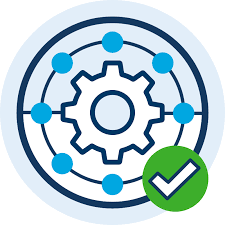</center>


<center><h2>It's very simple,we will search the parameters of the model to a function, and I hope it's not the best we'll have improved.</h2></center>
  <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

                


<center><b style="color:#DC143C;">I will try the following parameters.</b></center>
<center><b style="color:#DC143C;">Try everything for more success.</b></center>

In [ ]:
MLPC_params = {
    'alpha':[0.1,0.01,0.02,0.005,0.0001,0.00001],
    'hidden_layer_sizes':[(10,10,10),
                         (100,100,100),
                         (100,100),
                         (3,5),
                         (5,3)],
    'solver':['lbfgs','adam','sgd'],
    'activation':['relu','logistic']
}
MLPC = MLPClassifier() # Clean models
MLPC_cv_model = GridSearchCV(MLPC,MLPC_params,cv=10,n_jobs=-1,verbose=2)
MLPC_cv_model.fit(x_train_scaled,y_train)
# If you don't know this method, gridsearch cv python --> investigate

<center><h2 style="color:#228B22;">Yes search is complete, took some time but no problem.</h2></center>


<center><b style="color:#32CD32;">Now let's see the best parameters for us.</b></center>

In [ ]:
print('Best parameter for you <3:' + str(MLPC_cv_model.best_params_))

<center><h2 style="color:#228B22;">Yes, we are building a new model according to this parameter.</h2></center>

In [ ]:
MLPC_tuned = MLPClassifier(activation=MLPC_cv_model.best_params_['activation'],
                            alpha=MLPC_cv_model.best_params_['alpha'],
                            hidden_layer_sizes=MLPC_cv_model.best_params_['hidden_layer_sizes'],
                            solver=MLPC_cv_model.best_params_['solver'])
MLPC_tuned.fit(x_train_scaled,y_train)
y_pred_tuned = MLPC_tuned.predict(x_test_scaled)
accuracy_score(y_test,y_pred_tuned)

<center><h2 style="color:#228B22;">This is funny, we would have expected more. in fact, the event here is more than increasing success. Verify success.</h2></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
<center><h1 style="color:#C71585;">Thank you for reading, please do not forget to comment!.</h1></center>
        <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
<center><img src="https://media.tenor.com/images/5c87d1dde8f109016a2df6077a8a326e/tenor.png" width=300></center>